# Innovating Journalism
## Practical Python exercise 5: Data visualization

*Damian Trilling and Penny Sheets*

This notebook illustrates what you should consider when making visualizations.

While we will use 
- `matplotlib`
- `seaborn`
- `bokeh`

please note that this Notebook is **not** made to teach you one specific library -- there are multiple ones, and some might be better for some cases than others. 

For instance, 
- `plotly`
- `pygal`

are cool as well.


Some background about our modules of choice:

`matplotlib` is the standard work horse. It's neither smart nor beautiful, but the decent option that just does its job. It is what happens under the hood if you use the `.plot()` methods in `pandas`, but you can also just directly feed it some lists and dictionaries as input.


`seaborn` offers more beautiful output, has many more options, is smarter and can produce advanced statistical plots. It is also a bit easier to use. Its a bit like `ggplot2` in R.


`bokeh` allows to create interactive visualizations in which users can hover over elements, zoom in, etc.



## Preparation
Import some modules, load some example datasets

In [11]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [26]:
woz = pd.read_csv('wijken_long.csv')
woz.head()

,Unnamed: 0,wijk,stadsdeel,code,year,woz-waarde
0,0,Burgwallen-Oude Zijde,Centrum,A00,2014,263417.0
1,1,Burgwallen-Nieuwe Zijde,Centrum,A01,2014,267895.0
2,2,Grachtengordel-West,Centrum,A02,2014,490251.0
3,3,Grachtengordel-Zuid,Centrum,A03,2014,469946.0
4,4,Nieuwmarkt/Lastage,Centrum,A04,2014,295239.0


In [28]:
woz.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
woz.describe()

,year,woz-waarde
count,490.000000,4.780000e+02
mean,2016.000000,2.856571e+05
std,1.415659,1.369124e+05
min,2014.000000,7.813700e+04
25%,2015.000000,1.914288e+05
50%,2016.000000,2.516580e+05
75%,2017.000000,3.329392e+05
max,2018.000000,1.003743e+06


# 1. Pie charts

- proportions
- categorical (nominal) data
- makes only sense if adds up to 100%


Related: donut plots, possibly with subgroups (https://python-graph-gallery.com/163-donut-plot-with-subgroups/)

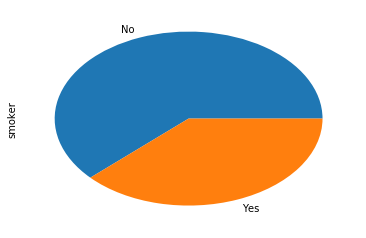

In [32]:
tips['smoker'].value_counts().plot(kind='pie')

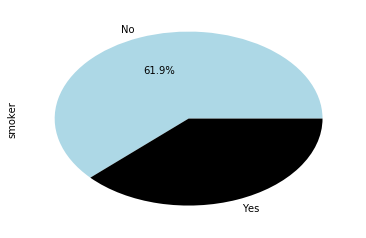

In [41]:
tips['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','black'])

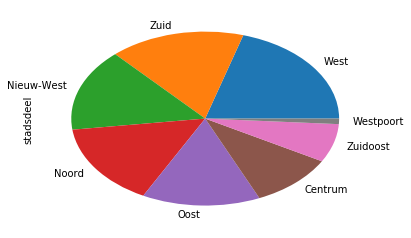

In [10]:
df['stadsdeel'].value_counts().plot(kind='pie')

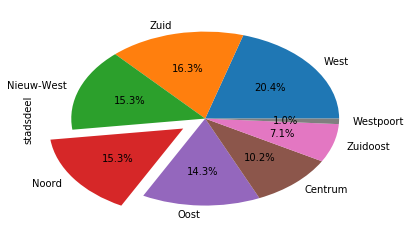

In [45]:
df['stadsdeel'].value_counts().plot(kind='pie',explode=[0,0,0,0.2,0,0,0,0], autopct='%1.1f%%')

## Discuss

- Do you like pie charts? Why (not)?
- When are they problematic?
- When can they have added value for a narrative?

.


***Your notes here***


.

# 2. Bar charts

- counts per (discrete) category
- or: other statistical property (e..g, mean)  per (discrete) category
- different variations (e.g., stacked bar charts)



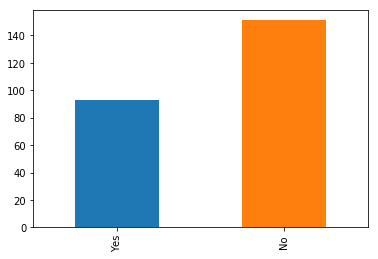

In [56]:
# with matplotlib
tips['smoker'].value_counts(sort=False).plot(kind='bar')

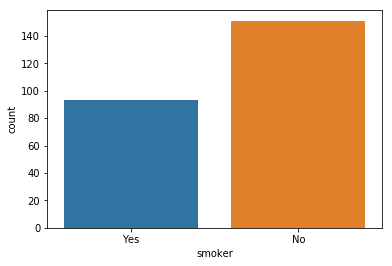

In [57]:
# with seaborn
sns.countplot(x = 'smoker', data=tips)

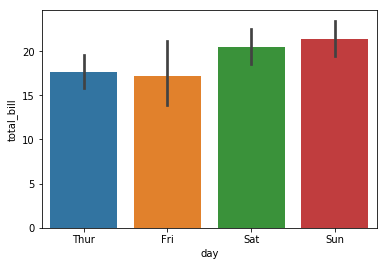

In [68]:
sns.barplot(x="day", y="total_bill", data=tips)

### Grouped barplots

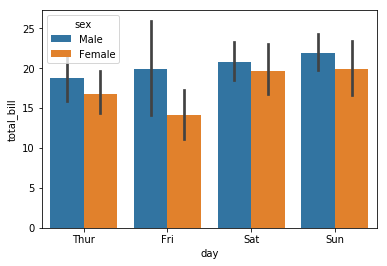

In [62]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

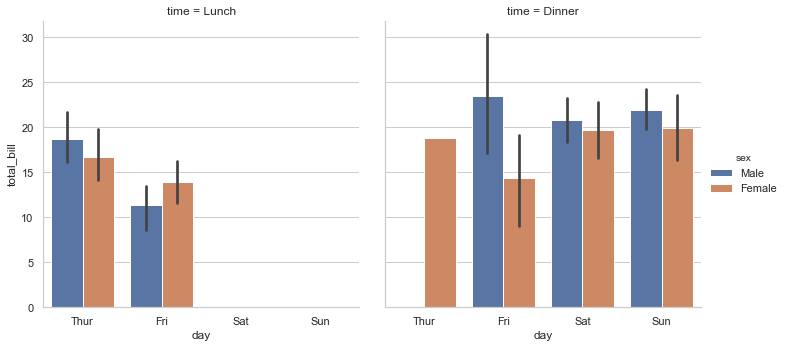

In [97]:
sns.catplot(x="day", y="total_bill", hue="sex", col = 'time', kind='bar', data=tips)

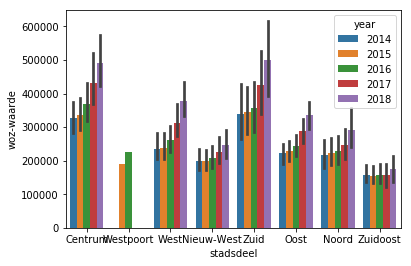

In [78]:
sns.barplot(x="stadsdeel", y="woz-waarde", hue='year', data=woz)

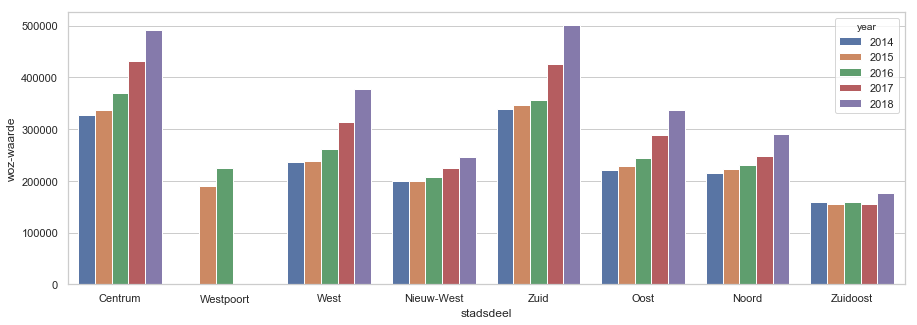

In [83]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=ax, x="stadsdeel", y="woz-waarde", hue='year', data=woz, ci = None)

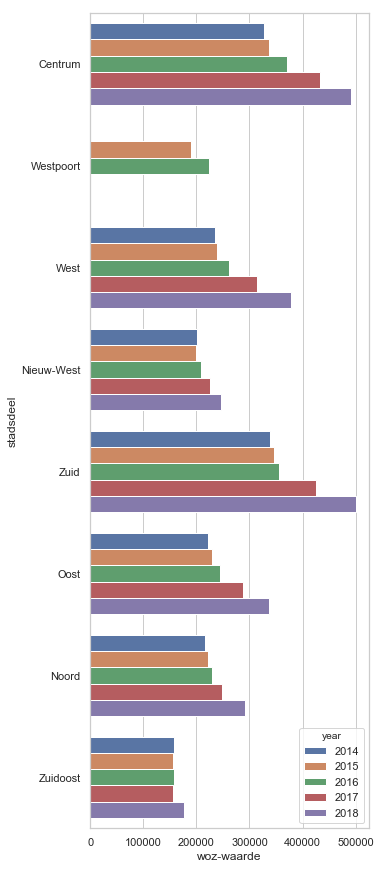

In [92]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5,15))
sns.barplot(ax=ax, y="stadsdeel", x="woz-waarde", hue='year', data=woz, ci = None, orient='h')

### Discuss

- What are the differences between pie charts and bar charts?
- How can they support your narrative?
- What are their limitations?
- For which types of data are they most appropriate?

.


***Your notes here***


.

# 3. Point charts

- similar to bar charts
- but: can look 'cleaner'
- but: can give a clearer message if the categories can be meaningfully ordered

Compare the following two charts that present the same data:



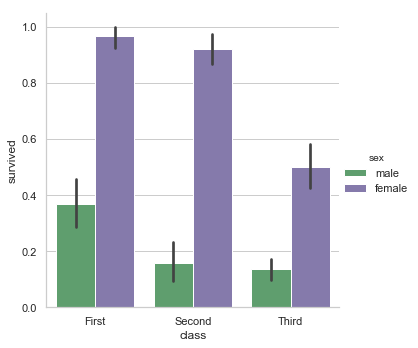

In [111]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            kind="bar", data=titanic);

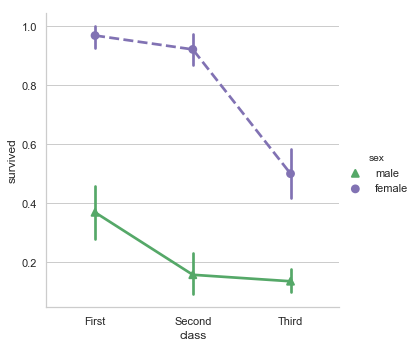

In [109]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

### Discuss

- Which chart do you prefer? Why?

.


***Your notes here***


.

# 3. Line charts

- ordered (and typically evenly spaced) values on x-axis
- x-axis has many (in theory: contious) measurements
- most typical: plot some value(s) over time


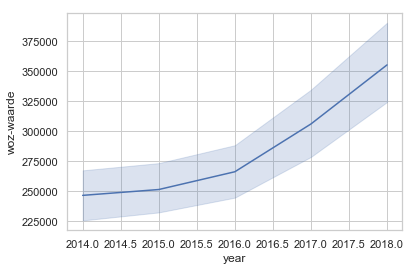

In [116]:
sns.lineplot(x='year', y='woz-waarde', data=woz)

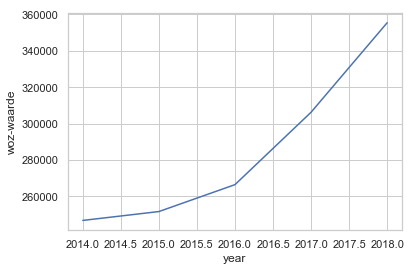

In [117]:
sns.lineplot(x='year', y='woz-waarde', data=woz ,ci=None)

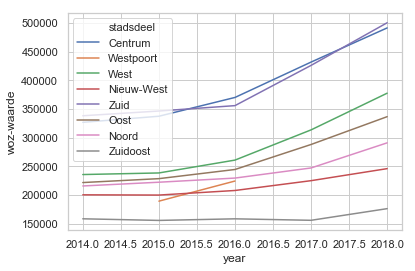

In [118]:
sns.lineplot(x='year', y='woz-waarde', hue='stadsdeel', data=woz ,ci=None)

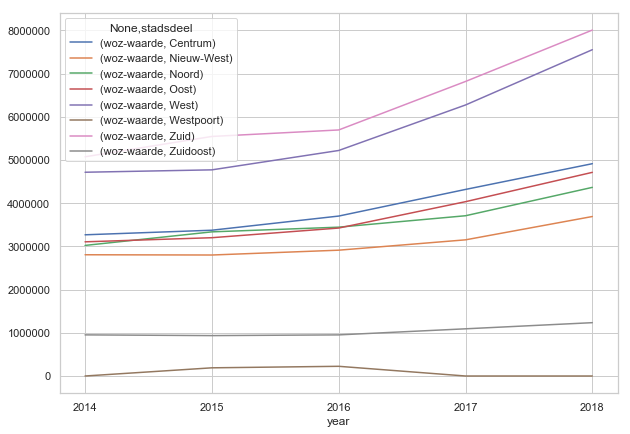

In [156]:
# or using the more complicated pandas/matplotlib syntax
woz.groupby(['year','stadsdeel']).agg(sum).unstack().plot(figsize=[10,7],xticks=range(2014,2019))

### Discuss

- When is a line chart (not) suitable)?
- Any additional considerations?

.


***Your notes here***


.

# 4. Plotting bivariate relationships

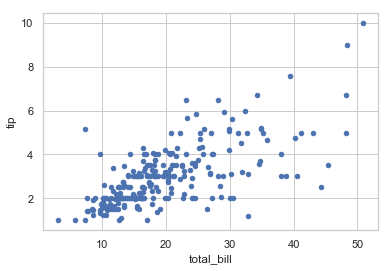

In [164]:
# pandas/matplotlib
tips.plot(x='total_bill', y='tip', kind='scatter')

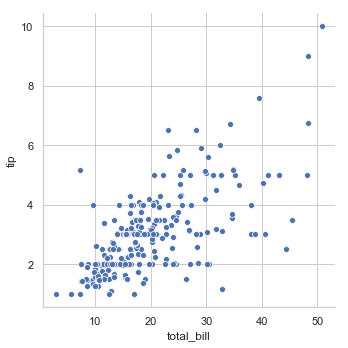

In [165]:
# the same with seaborn
sns.relplot(x='total_bill', y='tip', data=tips)

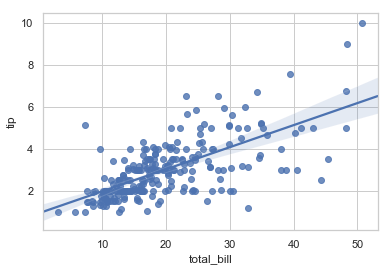

In [167]:
# but seaborn can do more, e.g. add a regression line and confidence intervals
sns.regplot(x='total_bill', y='tip', data=tips)

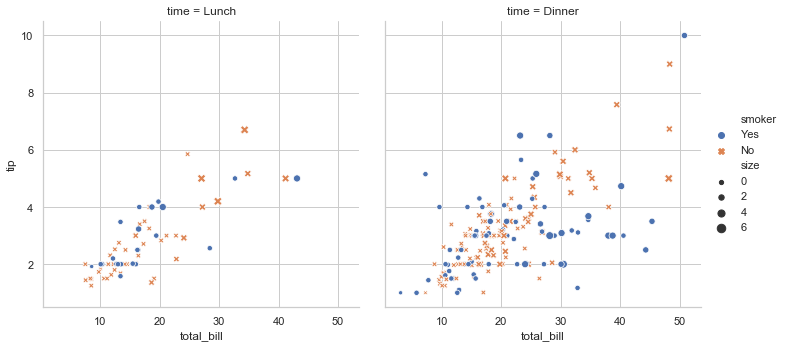

In [169]:
# again, we can aff different facets
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

### Discuss

- Which data are suitable for such bivariate plots?
- Which options do you like best?

.


***Your notes here***


.

# 5. Additional (statistical) plots

Have a look at the seaborn website (http://seaborn.pydata.org/) or at the Python Graph Gallery (https://python-graph-gallery.com/) for more inspiration, including cool stuff like

- violin plots
- kernel density plots
- ...
- ...

# Interactivity 

As discussed in the literature for this week, interactivity should have a function. For instance, it can be used to reduce information overload while still providing information 'on demand' if users want to dig into it.

Consider the example below where the user at a first glance can get an idea of the geographical distribution of unemployment, but if they really want to know can even get the exact number for each and every county by hovering over it.

More complicated online demos of bokeh apps:

- https://demo.bokehplots.com/apps/stocks
- https://demo.bokehplots.com/apps/movies


In [4]:
import bokeh
bokeh.sampledata.download()

Using data directory: /Users/damian/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Downloading:

In [174]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate)", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)